In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1') 
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame으| 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, 
                                                    test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}' .format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율') 
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율') 
print(y_test.value_counts()/test_cnt)


학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로， random state는 예제 수행 시마다 동일 예측 결과를 위해 설정 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83633	validation_1-auc:0.81797
[1]	validation_0-auc:0.84114	validation_1-auc:0.81945
[2]	validation_0-auc:0.84148	validation_1-auc:0.81925
[3]	validation_0-auc:0.84223	validation_1-auc:0.82011
[4]	validation_0-auc:0.84305	validation_1-auc:0.82092
[5]	validation_0-auc:0.84421	validation_1-auc:0.82128
[6]	validation_0-auc:0.84488	validation_1-auc:0.82226
[7]	validation_0-auc:0.84726	validation_1-auc:0.82399
[8]	validation_0-auc:0.84801	validation_1-auc:0.82440
[9]	validation_0-auc:0.84909	validation_1-auc:0.82552
[10]	validation_0-auc:0.85073	validation_1-auc:0.82786
[11]	validation_0-auc:0.85278	validation_1-auc:0.82934
[12]	validation_0-auc:0.85464	validation_1-auc:0.82931
[13]	validation_0-auc:0.85580	validation_1-auc:0.82998
[14]	validation_0-auc:0.85634	validation_1-auc:0.83004
[15]	validation_0-auc:0.85706	validation_1-auc:0.83014
[16]	validation_0-auc:0.85757	validation_1-auc:0.83041
[17]	validation_0-auc:0.85838	validation_1-auc:0.83004
[18]	validation_0-au

In [10]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [11]:
from hyperopt import hp

# max_depth는 5에서 15까지 1 간격으로, min_child_weight는 1에서 6까지 1 간격으로
# colsamplbe_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15,1),
                    'min_child_weight': hp.quniform('min_childe_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2) }

In [12]:
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf=XGBClassifier(n_estimators=30,max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          colsample_bytree=search_space['colsample_bytree'],
                          learning_rate=search_space['learning_rate'])

    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list=[]
    
    #3개의 k-fold 방식 적용
    kf=KFold(n_splits=3)
    #X_train을 다시 학습과 검증용 데이터 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr,y_tr=X_train.iloc[tr_index],y_train.iloc[tr_index]
        X_val,y_val=X_train.iloc[val_index],y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=10,eval_metric='auc',
                    eval_set=[(X_tr,y_tr),(X_val,y_val)])

    # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
    score=roc_auc_score(y_val,xgb_clf.predict_proba(X_val)[:,1])
    roc_auc_list.append(score)
        
    #3개의 k-fold로 계산된 roc-auc값의 평균값 반한하되, 
    #HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한뒤 반환
    return -1*np.mean(roc_auc_list)

In [13]:
from hyperopt import fmin,tpe,Trials

trials=Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적 함수의 최솟값을 가지는 최적 입력값 추출 
best = fmin(fn=objective_func,
          space=xgb_search_space,
          algo=tpe.suggest,
          max_evals=5, # 최대 반복 횟수 지정
          trials=trials, rstate=np.random.default_rng(seed=30))

print('best:',best)

[0]	validation_0-auc:0.77226	validation_1-auc:0.74366                           
[1]	validation_0-auc:0.83765	validation_1-auc:0.80715                           
[2]	validation_0-auc:0.83102	validation_1-auc:0.80078                           
[3]	validation_0-auc:0.84165	validation_1-auc:0.81237                           
[4]	validation_0-auc:0.84909	validation_1-auc:0.81986                           
[5]	validation_0-auc:0.85194	validation_1-auc:0.82242                           
[6]	validation_0-auc:0.85389	validation_1-auc:0.82458                           
[7]	validation_0-auc:0.85659	validation_1-auc:0.82698                           
[8]	validation_0-auc:0.85805	validation_1-auc:0.82747                           
[9]	validation_0-auc:0.85831	validation_1-auc:0.82751                           
[10]	validation_0-auc:0.85894	validation_1-auc:0.82789                          
[11]	validation_0-auc:0.85983	validation_1-auc:0.82796                          
[12]	validation_0-auc:0.8611

In [14]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행 
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = round(best['learning_rate'], 5),
                        max_depth = int(best['max_depth']),
                        min_child_weight = int(best['min_childe_weight']),
                        colsample_btree = round(best['colsample_bytree'], 5)
                       )

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100,
            eval_metric = "auc", eval_set = [(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83550	validation_1-auc:0.81494
[1]	validation_0-auc:0.84201	validation_1-auc:0.81956
[2]	validation_0-auc:0.84329	validation_1-auc:0.82111
[3]	validation_0-auc:0.84463	validation_1-auc:0.82236
[4]	validation_0-auc:0.84602	validation_1-auc:0.82322
[5]	validation_0-auc:0.84714	validation_1-auc:0.82371
[6]	validation_0-auc:0.85154	validation_1-auc:0.82752
[7]	validation_0-auc:0.85231	validation_1-auc:0.82748
[8]	validation_0-auc:0.85469	validation_1-auc:0.82866
[9]	validation_0-auc:0.85620	validation_1-auc:0.82909
[10]	validation_0-auc:0.85703	validation_1-auc:0.82941
[11]	validation_0-auc:0.85755	validation_1-auc:0.82918
[12]	validation_0-auc:0.85868	validation_1-auc:0.82960
[13]	validation_0-auc:0.86036	validation_1-auc:0.83062
[14]	validation_0-auc:0.86118	validation_1-auc:0.83157
[15]	validation_0-auc:0.86264	validation_1-auc:0.83256
[16]	validation_0-auc:0.86339	validation_1-auc:0.83285
[17]	validation_0-auc:0.86408	validation_1-auc:0.83352
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

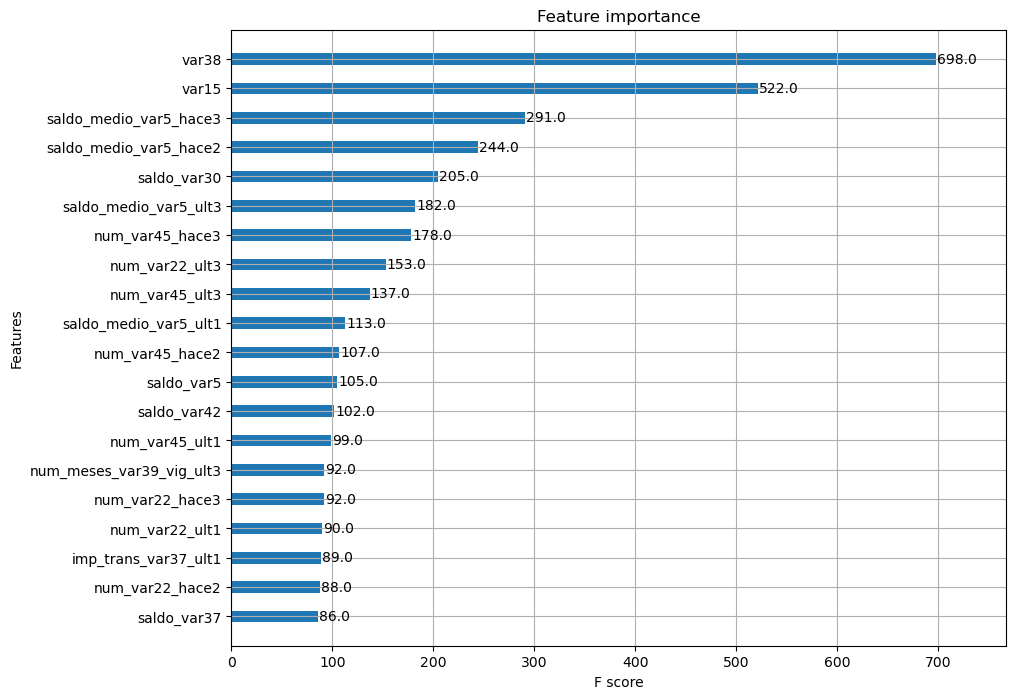

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

In [16]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [24]:
from lightgbm import LGBMClassifier
from lightgbm import early_stopping

lgbm_clf = LGBMClassifier(n_estimators = 500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=100)], eval_metric = "auc", eval_set = eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1902, number of negative: 46750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13745
[LightGBM] [Info] Number of data points in the train set: 48652, number of used features: 248
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039094 -> initscore=-3.201908
[LightGBM] [Info] Start training from score -3.201908
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	training's auc: 0.888118	training's binary_logloss: 0.120614	valid_1's auc: 0.839514	valid_1's binary_logloss: 0.133247
ROC AUC: 0.8401


In [25]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [30]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators = 100,
                              num_leaves = int(search_space['num_leaves']),
                              max_depth = int(search_space['max_depth']),
                              min_child_samples = int(search_space['min_child_samples']),
                              subsample = search_space['subsample'],
                              learning_rate = search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []

    # 3개 k-fold 방식 적용
    kf = KFold(n_splits = 3)

    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 인덱스 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=30)], eval_metric = "auc",
                     eval_set = [(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한뒤 반환
    return -1 * np.mean(roc_auc_list)

In [27]:
pip install --upgrade hyperopt

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn = objective_func, space = lgbm_search_space, algo = tpe.suggest,
            max_evals = 50, # 최대 반복 횟수 지정
            trials = trials, rstate = np.random.default_rng(seed = 30))

print('best:', best)

[LightGBM] [Info] Number of positive: 1579, number of negative: 38965           
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827                                              
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872 
[LightGBM] [Info] Start training from score -3.205872                           
Training until validation scores don't improve for 30 rounds                    
Did not meet early stopping. Best iteration is:                                 
[98]	training's auc: 0.88765	training's binary_logloss: 0.121808	valid_1's auc: 0.831519	valid_1's binary_logloss: 0.135868
[LightGBM] [Info] Number of positive: 1609, number of negative: 38935 

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators = 500, num_leaves = int(best['num_leaves']),
                          max_depth = int(best['max_depth']),
                          min_child_samples = int(best['min_child_samples']),
                          subsample = round(best['subsample'], 5),
                          learning_rate = round(best['learning_rate'], 5)
                         )

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, 
             eval_metric = "auc", eval_set = [(X_tr, y_tr), (X_val, y_val)])

lgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))